## Задание 1. Закон сохранения энергии

Рассмотрим три модели запуска тела массой 1 кг вертикально вверх, которые были рассмотрены ранее. Начальные условия для моделей и полученные результаты приведены ниже.

\begin{align*}
&\text{Модель №1} && \text{Модель №2} && \text{Модель №3} \\
&\left\{
\begin{array}{l}
m \ddot h = -m g, \\
h(0) = 0, \\
\dot h(0) = 100.
\end{array}
\right.
&&
\left\{
\begin{array}{l}
m \ddot h = -m g - k \dot h, \\
h(0) = 0, \\
\dot h(0) = 100.
\end{array}
\right.
&&
\left\{
\begin{array}{l}
m \ddot h = -m g - k \dot h^2, \\
h(0) = 0, \\
\dot h(0) = 100.
\end{array}
\right.
\end{align*}

\begin{align*}
\begin{array}{l}
t_{max} = 62.5 \ \text{с}, \\
t_{back} = 125 \ \text{с}, \\
h_{max} = 3125 \ \text{м}.
\end{array}
&&
\begin{array}{l}
t_{max} \approx 48 \ \text{с}, \\
t_{back} \approx 106 \ \text{с}, \\
h_{max} \approx 2232 \ \text{м}.
\end{array}
&&
\begin{array}{l}
t_{max} \approx 11 \ \text{с}, \\
t_{back} \approx 33 \ \text{с}, \\
h_{max} \approx 207 \ \text{м}.
\end{array}
\end{align*}

В первой модели выполняется закон сохранения энергии. Тело поднимается вверх, его скорость уменьшается — кинетическая энергия падает, а потенциальная возрастает.  
Сумма кинетической и потенциальной энергий остаётся постоянной, что можно записать так:
$$E = E_k + E_p = \frac{1}{2}mv^2 + mgh,$$
где $E_k$ — кинетическая энергия, $E_p$ — потенциальная энергия, $E$ — полная механическая энергия.

В момент выстрела:
$$E = \frac{1}{2}mv_{0}^{2},$$
а в момент наивысшей точки (при $v = 0$):
$$E = mgh_{max}.$$
Из равенства этих энергий следует:
$$\displaystyle h_{max} = \frac{v_{0}^{2}}{2g} = \frac{100^2}{2 \cdot 1.6} = 3125.$$
Здесь вся кинетическая энергия полностью переходит в потенциальную — без потерь.

Первая модель представляет собой **консервативную систему**, поскольку на тело действует только одна консервативная сила, то есть сила, работа которой при перемещении тела из одной точки в другую зависит только от начального и конечного положений, но не от формы траектории.

Рассмотрим графики изменения энергии для первой модели.

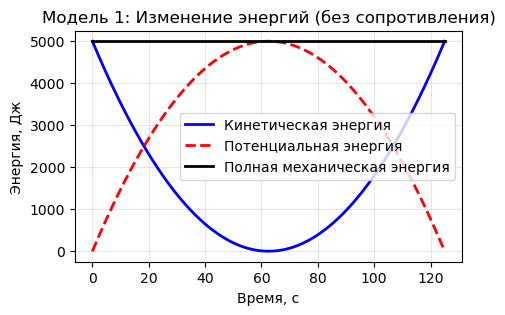

Начальная энергия: 5000.00 Дж
Максимальная полная энергия: 5000.00 Дж
Минимальная полная энергия: 5000.00 Дж


In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# параметры
m = 1.0     # кг
g = 1.6     # м/с^2
v0 = 100.0  # начальная скорость, м/с
k = 0.01    # коэффициент линейного (квадратичного) сопротивления, кг/с (кг/м)

t = sp.Symbol('t', real=True, nonnegative=True)

t_vals = np.linspace(0, 125, 1000)

# Модель 1: без сопротивления
v1 = v0 - g * t
y1 = v0 * t - g * t**2 / 2

def f_E_kin1(t_val):
    v = v0 - g * t_val
    return 0.5 * m * v**2
    
def f_E_pot1(t_val):
    y = v0 * t_val - g * t_val**2 / 2
    return m * g * y

def f_E_mech1(t_val):
    return f_E_kin1(t_val) + f_E_pot1(t_val)

E_kin1_vals = [f_E_kin1(t_val) for t_val in t_vals]
E_pot1_vals = [f_E_pot1(t_val) for t_val in t_vals]
E_mech1_vals = [f_E_mech1(t_val) for t_val in t_vals]

plt.figure(figsize=(5, 3))
plt.plot(t_vals, E_kin1_vals, 'b-', label='Кинетическая энергия', linewidth=2)
plt.plot(t_vals, E_pot1_vals, 'r--', label='Потенциальная энергия', linewidth=2)
plt.plot(t_vals, E_mech1_vals, 'k-', label='Полная механическая энергия', linewidth=2)
plt.xlabel('Время, с')
plt.ylabel('Энергия, Дж')
plt.title('Модель 1: Изменение энергий (без сопротивления)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show();

# проверка сохранения энергии
print(f"Начальная энергия: {f_E_kin1(0):.2f} Дж")
print(f"Максимальная полная энергия: {np.max(E_mech1_vals):.2f} Дж")
print(f"Минимальная полная энергия: {np.min(E_mech1_vals):.2f} Дж")

Во второй и третьей моделях на тело дополнительно действует неконсервативная сила — сила сопротивления. Энергия системы не сохраняется: часть кинетической энергии расходуется на преодоление сопротивления среды, например, превращаясь в тепло, которое рассеивается в окружающем пространстве.

Найдём численно потерю энергии во втором случае.

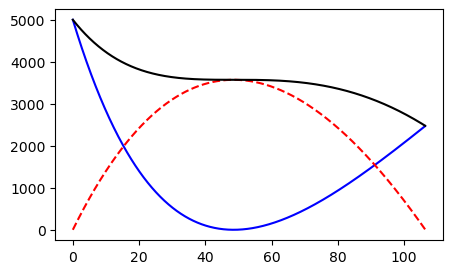

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Время интегрирования
t_full = 125
t_span = (0, t_full) 
t_eval = np.linspace(0, t_full, 1001)

def model2(t, y):
    x, v = y
    return [v, -g -(k/m) * v]

# Начальные условия: h(0) = 0, v(0) = v0
y0 = [0, v0]
sol2 = solve_ivp(model2, t_span, y0, t_eval=t_eval, method='DOP853', rtol=1e-08, atol=1e-08)

# Вычисляем энергии для каждой модели
def calculate_energies(h, v):
    kinetic = 0.5 * m * v**2
    potential = m * g * h
    total = kinetic + potential
    return kinetic, potential, total

# находим индекс, где высота становится < 0
index = np.where(sol2.y[0] < 0)[0][0]
t_val = sol2.t[:index]    # здесь время
s_val = sol2.y[0][:index] # здесь путь
v_val = sol2.y[1][:index] # здесь скорость

# Энергии для модели 2
K2, P2, E2 = calculate_energies(s_val, v_val)

plt.figure(figsize=(5, 3))
plt.plot(t_val, K2, 'b')    # кинетическая энергия
plt.plot(t_val, P2, 'r--')  # потенциальная энергия
plt.plot(t_val, E2, 'k-');   # полная механическая энергия

На графике видно, что потенциальная энергия гравитации — **консервативная**, она не теряется. Потери происходят за счёт уменьшения кинетической энергии.

Можно вычислить потерю полной механической энергии во времени.

In [3]:
E0 = 0.5 * m * v0**2  # начальная кинетическая энергия
print(f"ПОТЕРИ ЭНЕРГИИ (начальная - минимальная полная): Модель 2: {E0 - np.min(E2):.2f} Дж")

ПОТЕРИ ЭНЕРГИИ (начальная - минимальная полная): Модель 2: 2522.48 Дж


---

**Задание**

Постройте графики изменения энергий для **третьей модели** и определите потерю **кинетической энергии**.  
Для оси энергий используйте **логарифмическую шкалу**: `plt.yscale('log')`.

## Задание 2. Пружинный маятник на поверхности

Рассмотрим свободные колебания системы груз—пружина без затухания, где груз перемещается горизонтально по поверхности. В модели рассмотрим единственную силу, направленную в горизонтальном направлении, — **силу упругости пружины**, величина которой определяется законом Гука: сила пропорциональна изменению длины пружины относительно её естественной (недеформированной) длины.

В одномерной системе начало координат соответствует естественной длине пружины.  
Функция $x(t)$ определяет положение груза в момент времени $t$.

Пусть груз смещён вдоль поверхности на $\Delta x$ относительно начала координат в положительном направлении $x$ (то есть вправо). Тогда сила пружины направлена обратно — в сторону начала координат:  
$$F = -k \Delta x.$$

Вес груза $mg$ и нормальная реакция опоры $N$ действуют вертикально и не влияют на горизонтальное движение, поэтому их можно не учитывать. Используя второй закон Ньютона, получаем уравнение движения:

$$ m a = -k \Delta x,$$
$$ m \ddot{x} = -k x.$$

Таким образом, получаем уравнение гармонических колебаний:

$$\ddot{x}(t) + \frac{k}{m} x(t) = 0.$$

Обозначим положительный коэффициент $\frac{k}{m}$ как $\omega^2$ и найдём решение уравнения с помощью `sympy` при начальных условиях: смещение вправо на величину $A$ и нулевая начальная скорость.

In [4]:
import sympy as sp
A, omega, t = sp.symbols("A omega t",real=True, positive=True)
x = sp.Function("x")(t)

ode = sp.Eq(x.diff().diff(), -x*omega**2)
xt = sp.dsolve(ode, x, ics = {x.subs(t, 0): A, x.diff().subs(t, 0): 0.0})
xt

Eq(x(t), A*cos(omega*t))

Параметр $A$ называют **амплитудой колебаний**.  
Часто используется также **размах колебаний** (peak-to-peak amplitude), равный $2A$ в случае симметричных функций. Тогда саму амплитуду иногда называют **пиковой амплитудой**, определяемой как максимальное отклонение от среднего значения (в нашем случае — от нуля).


Параметр $\omega$ называется **собственной циклической частотой**. Она определяется только физическими свойствами системы (массой и жёсткостью пружины), а не начальными условиями, поэтому собственная.


**Периодом** ${\displaystyle T = \frac{2\pi}{\omega}}$ колебаний называют минимальное время, через которое система возвращается в исходное состояние (положение и скорость груза совпадают):

**Частотой** $\displaystyle f=\frac{\omega}{2\pi}$, называется величина обратная периоду $T$, которая определяет количество элементарных колебаний в единицу времени. В случае рассмотренного ранее математического маятника вводится понятие **угловой частоты**, которая связана с частотой $f$ соотношением $\omega = 2 \pi f$. Таким образом период, частота и угловая частота связаны следующими соотношениями:
$$f = \frac{1}{T}, \qquad \omega = 2 \pi f = \frac{2 \pi}{T}$$

Визуализируем функцию $x(t)$ для $t \in [0, 10\pi]$ при параметрах $A = 0.1$ и $\omega = 1$.

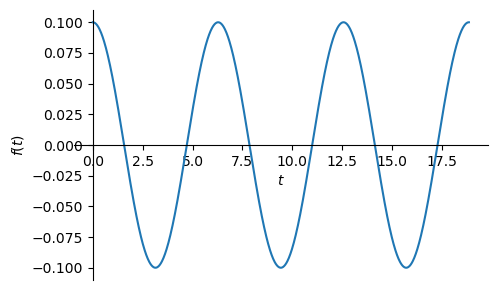

In [5]:
p = sp.plot(xt.rhs.subs(A, 0.1).subs(omega, 1), (t, 0, 6*sp.pi), size=(5, 3),show = False)
p.show()

Теперь рассмотрим модифицированную модель с явными физическими параметрами: масса, длина и жёсткость пружины в физических единицах. Решим уравнение численно и визуализируем движение, представив груз квадратным телом, а пружину — синусоидой.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp
from IPython.display import HTML
plt.rcParams["animation.html"] = "html5"

# параметры системы
m = 1.0       # масса, кг
k = 1.0       # жёсткость пружины, Н/м
x0 = 0.1      # начальное смещение, м
v0 = 0.0      # начальная скорость, м/с
L0 = 0.9      # естественная длина пружины

def pend(t, y):
    x, v = y
    return [v, -(k/m)*x]

# начальные условия
y0 = [x0, v0]

t_full = 2*np.pi
t_span = (0, t_full) 
t_eval = np.linspace(0, t_full, 1001) 

sol = solve_ivp(pend, t_span, y0, t_eval=t_eval, method='DOP853', rtol=1e-08, atol=1e-08)
t = sol.t
x = sol.y[0]

# настройка сцены
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.3, 0.3)
ax.set_aspect('equal')
ax.axis('off')

# Стена слева
ax.plot([-0.5, -0.5], [-0.1, 0.1], color='black', lw=4)
ax.plot([-0.5, L0+2*x0], [-0.11, -0.11], color='black', lw=4)
ax.plot([L0-0.1, L0-0.1], [-0.5, -0.1], color='black', lw=1)

# Объекты
mass = plt.Rectangle((L0 - 0.1 + x[0], -0.1), 0.2, 0.2, fc='gray')
ax.add_patch(mass)
spring_line, = ax.plot([], [], color='green', lw=2)

def spring_coords(x_right, coils=12, amp=0.05):
    x_s = np.linspace(-0.5, x_right, coils * 20)
    y_s = amp * np.sin(np.linspace(0, coils * 2 * np.pi, coils * 20))
    return x_s, y_s

# анимация
def init():
    sx, sy = spring_coords(L0 - 0.1 + x[0])
    spring_line.set_data(sx, sy)
    mass.set_x(L0 - 0.1 + x[0])
    return spring_line, mass

def update(frame):
    sx, sy = spring_coords(L0 - 0.1 + x[frame])
    spring_line.set_data(sx, sy)
    mass.set_x(L0 - 0.1 + x[frame])
    return spring_line, mass

ani = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True, interval=1)
plt.close(fig)  # скрыть статичное изображение
HTML(ani.to_html5_video())

Текущая модель пружинного маятника является **динамической системой**. Динамическая система — это математическая модель, которая описывается:
1. множеством элементов, связанных функциональной зависимостью с временем;
2. положением элементов в фазовом пространстве.

Она характеризуется начальным состоянием и законом, определяющим эволюцию системы.  
Множество всех возможных состояний системы называется **фазовым пространством**.  
**Эволюция системы** — это изменение её состояния со временем.

Основная задача теории динамических систем — это исследование поведения систем. Это включает разбиение фазового пространства на траектории и изучение предельного поведения этих траекторий. Также включается поиск и классификация положений равновесия, выделение притягивающих (аттракторы) и отталкивающих (репеллеры) множеств. 

Визуализация фазового пространства позволяет качественно анализировать динамику. Для систем с одной степенью свободы фазовое пространство сводится к **фазовой плоскости**. Однако, чтобы видеть эволюцию во времени, в трёхмерной визуализации часто добавляют ось времени.

Решение уравнения пружинного маятника $x(t)$ определяется начальными условиями. В момент времени $t_n$ состояние системы задаётся парой $(x(t_n), \dot{x}(t_n))$. Множество таких точек образует **фазовую траекторию**.

Множество точек $\{t, x(t)\}$ называют **интегральной кривой**, а **фазовой кривой** — проекцию этой зависимости на фазовую плоскость $(x, \dot{x})$.

Визуализируем фазовую плоскость для пружинного маятника.

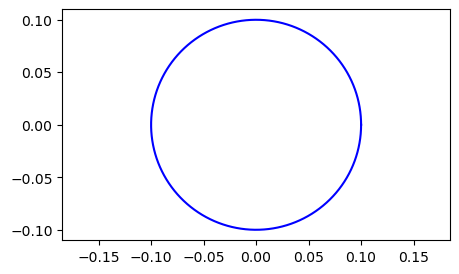

In [7]:
t = sol.t
x = sol.y[0]
xt = sol.y[1]

plt.figure(figsize=(5, 3))
plt.plot(x, xt, 'b')
plt.axis('equal');

В таком представлении сложно отследить эволюции системы (начало и конец), поэтому при визуализации также добавляют время следующим образом:

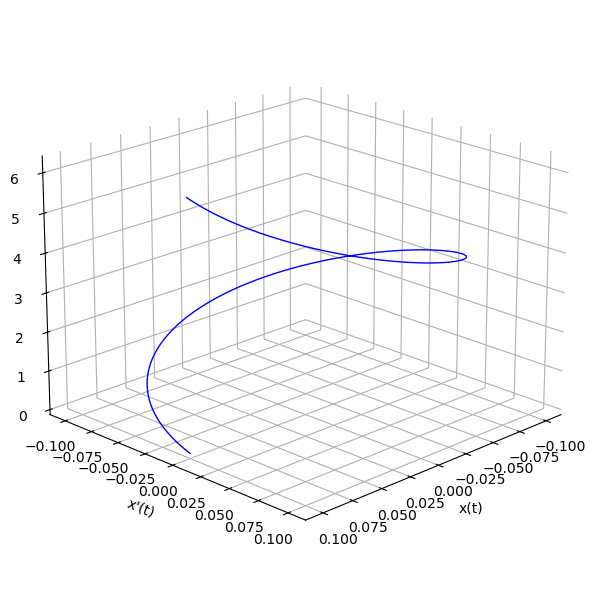

In [8]:
from mpl_toolkits.mplot3d import Axes3D

t = sol.t
x = sol.y[0]
v = sol.y[1]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Полностью прозрачные панели
ax.xaxis.pane.set_alpha(0)
ax.yaxis.pane.set_alpha(0)
ax.zaxis.pane.set_alpha(0)

ax.plot(x, v, t, 'b', linewidth=1)
ax.set_xlabel('x(t)')
ax.set_ylabel("x'(t)")
ax.set_zlabel('t')

ax.view_init(elev=20, azim=45)  # Угол обзора
plt.tight_layout()
plt.show()

Рассмотрим изменение энергии пружинного маятника:
$$E = E_k + E_p = \frac{1}{2} m v^2 + \frac{1}{2} k x^2.$$
Визуализируем полную механическую энергию и её компоненты во времени.

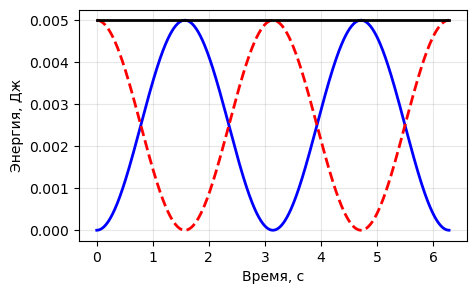

In [9]:
kinetic_energy = 0.5 * m * v**2
potential_energy = 0.5 * k * x**2
total_energy = kinetic_energy + potential_energy

plt.figure(figsize=(5, 3))
plt.plot(t, kinetic_energy, 'b', linewidth=2)      # Кинетическая энергия
plt.plot(t, potential_energy, 'r--', linewidth=2)  # Потенциальная энергия
plt.plot(t, total_energy, 'k-', linewidth=2)       # Полная энергия
plt.xlabel('Время, с')
plt.ylabel('Энергия, Дж')
plt.grid(True, alpha=0.3);

---

**Задание**

Выполните трёхмерную визуализацию фазового пространства, где в начальный момент времени отклонение и скорость равны нулю, а затем под действием внешней силы возникают колебания, которые постепенно переходят в гармонические.

## Задание 3. Учёт массы пружины в моделях пружинного маятника

В рассмотренной ранее модели масса пружины не учитывалась. В этом случае вся кинетическая энергия системы сосредоточена в грузе. Однако, как видно из анимации, различные участки пружины движутся с разными скоростями, что также наблюдается в реальных физических экспериментах.  

Если пружина имеет массу $m_{s}$, то её движение не совпадает по скорости с движением груза. Витки, находящиеся ближе к грузу, совершают за время колебаний больший путь, чем витки, расположенные ближе к точке крепления. Следовательно, часть кинетической энергии хранится в движении самой пружины. Поскольку скорость разных участков пружины различна, массу пружины нельзя просто прибавить к массе груза для вычисления частоты колебаний.

При учёте массы пружины вводится понятие **эффективной массы пружины** $m_{\mathrm{eff}}$ — это эквивалентная масса, которая фактически участвует в движении вместе с грузом. Заметим, что ориентация системы (вертикальная, горизонтальная или наклонная) не влияет на период малых колебаний, поскольку внешнее ускорение не изменяет частоту движения относительно положения равновесия.

Исследования показывают, что для однородной пружины с равномерным распределением массы эффективная масса равна:
\begin{equation}
m_{\mathrm{eff}} = \frac{m_s}{3}.
\end{equation}

Это значение можно вывести из анализа кинетической энергии.

---

Рассмотрим элемент массы пружины $dm_{s}$ на расстоянии $s$ от точки крепления. Если этот элемент движется со скоростью $u(s)$, его кинетическая энергия равна:
\begin{equation}
dK = \frac{1}{2} dm_{s}\, u^2(s).
\end{equation}
Полная кинетическая энергия пружины:
\begin{equation}
K = \int_{\text{пружина}} \frac{1}{2} u^2\, dm_{s}.
\end{equation}

Для однородной пружины масса распределена равномерно:
\begin{equation}
dm_{s} = \frac{m_{s}}{y}\, ds,
\end{equation}
где \( y \) — текущая длина пружины. Тогда:
\begin{equation}
K = \frac{1}{2} \frac{m_{s}}{y} \int_0^y u^2(s)\, ds.
\end{equation}

Скорость каждого участка пропорциональна расстоянию до точки крепления:
\begin{equation}
u(s) = \frac{s}{y} v,
\end{equation}
где \( v \) — скорость груза. Подставим это выражение:
\begin{equation}
K = \frac{1}{2} \frac{m_{s}}{y} \int_0^y \left(\frac{s}{y}v\right)^2 ds
= \frac{1}{2} \frac{m_{s}}{y^3} v^2 \int_0^y s^2 ds
= \frac{1}{2} \frac{m_{s}}{3} v^2.
\end{equation}

Таким образом, эквивалентная (эффективная) масса пружины равна:
\begin{equation}
m_{\mathrm{eff}} = \frac{m_s}{3}.
\end{equation}

---

### Горизонтальный пружинный маятник

В горизонтальном случае гравитация не вызывает растяжения пружины, поскольку вес груза уравновешен нормальной реакцией опоры. Тогда полная энергия системы:
\begin{equation}
E = \frac{1}{2}\left(m + \frac{m_{s}}{3}\right)v^2 + \frac{1}{2}k x^2.
\end{equation}

Из второго закона Ньютона получаем уравнение движения:
\begin{equation}
\left(m + \frac{m_{s}}{3}\right)\ddot{x} = -k x.
\end{equation}

Задача Коши для этой системы:
\begin{equation}
\begin{cases}
\left(m+\tfrac{m_{s}}{3}\right)\ddot{x}(t) = -k\,x(t),\\[2mm]
x(0) = x_0,\\[1mm]
\dot{x}(0) = v_0.
\end{cases}
\end{equation}

---

### Вертикальный пружинный маятник

В вертикальном случае необходимо учитывать потенциальную энергию, связанную с силой тяжести. Потенциальная энергия пружины:
\begin{equation}
U = \int_{\text{пружина}} g s\, dm_{s} = \int_0^y \frac{m_{s}}{y} g s\, ds = \frac{1}{2} m_{s} g y.
\end{equation}

Полная энергия системы (пружина + груз):
\begin{equation}
E = \frac{1}{2}\left(m + \frac{m_{s}}{3}\right)v^2 + \frac{1}{2}k y^2 + \left(m + \frac{m_{s}}{2}\right)g y.
\end{equation}

Дифференцируя по времени, получаем уравнение движения:
\begin{equation}
\left(m + \frac{m_{s}}{3}\right)\ddot{y} = -k y - \left(m + \frac{m_{s}}{2}\right)g.
\end{equation}

Положение равновесия определяется из условия $\ddot{y} = 0$:
\begin{equation}
y_{\mathrm{eq}} = -\frac{\left(m + \tfrac{m_{s}}{2}\right)g}{k}.
\end{equation}

Введём отклонение от положения равновесия:
\begin{equation}
\bar{y} = y - y_{\mathrm{eq}}.
\end{equation}

Тогда уравнение движения принимает вид:
\begin{equation}
\left(m + \frac{m_{s}}{3}\right)\ddot{\bar{y}} = -k\,\bar{y}.
\end{equation}

Задача Коши для вертикального варианта:
\begin{equation}
\begin{cases}
\left(m+\tfrac{m_{s}}{3}\right)\ddot{y}(t) = -k\,y(t) - \left(m+\tfrac{m_{s}}{2}\right)g,\\[1mm]
y(0) = y_0,\\[1mm]
\dot{y}(0) = \dot{y}_0.
\end{cases}
\end{equation}

---

**Задание**

1. Решите обе задачи Коши — для горизонтального и вертикального случаев — аналитически или численно.  
2. Постройте графики смещения груза во времени для обеих систем.  
3. Определите периоды колебаний и объясните результат сравнения.

## Задание 4. Пружинный маятник c затуханием

Рассмотрим горизонтальный пружинный маятник, полностью погружённый в жидкость. На движущийся груз маятника действует, помимо силы упругости со стороны деформированной пружины, также **сила сопротивления** со стороны жидкости. Эта сила пропорциональна скорости движения груза и направлена **в сторону, противоположную движению тела**. Обозначая коэффициент пропорциональности через $\beta$, и применяя второй закон Ньютона, получаем уравнение движения системы:

$$
\displaystyle m \ddot{x} = -\beta \dot{x} - kx.
$$

Разделив обе части уравнения на массу $m$ и перенеся все слагаемые влево, получаем **линейное однородное дифференциальное уравнение с постоянными коэффициентами**:

$$
\displaystyle \ddot{x} + \frac{\beta}{m}\dot{x} + \frac{k}{m}x = 0.
$$

Введём обозначения:

$$
\displaystyle r = \frac{\beta}{2m}, \qquad \omega_0^2 = \frac{k}{m}.
$$

Тогда уравнение принимает вид:

$$
\displaystyle \ddot{x} + 2r\dot{x} + \omega_0^2 x = 0.
$$

Составим **характеристическое уравнение**:

$$
\displaystyle \lambda^2 + 2r\lambda + \omega_0^2 = 0.
$$

Решая квадратное уравнение и вычисляя дискриминант, получаем:

$$
\displaystyle \frac{D}{4} = r^2 - \omega_0^2.
$$

В зависимости от знака дискриминанта различают три качественно разных режима колебаний с затуханием:

- **Подкритическое затухание** ($D < 0$): затухающие колебания.  
- **Критическое затухание** ($D = 0$): система быстро возвращается в равновесие без колебаний.  
- **Надкритическое затухание** ($D > 0$): система возвращается к равновесию монотонно, без колебаний.

---

**Задание**

1. Постройте графики зависимости $x(t)$, отражающие **все три типа колебаний** с затуханием.  
2. Используйте следующие параметры:
   - $m = 1$ кг  
   - $k = 0.1$ Н/м  
   - $x(0) = 0.1$ м  
   - $x'(0) = 0$ м/с  
3. Решите соответствующие дифференциальные уравнения с помощью библиотеки `scipy` (или `sympy`).  
4. Постройте **фазовый портрет** системы и сравните его с фазовым портретом **свободных (гармонических)** колебаний.


## Задание 5. Вынужденные колебания при гармонической внешней силе

Рассмотрим модель **вынужденных колебаний** простого пружинного маятника, к грузу которого приложена внешняя сила $F(t)$, не зависящая от текущего состояния маятника (положения и скорости), но зависящая от времени $t$. 
Особый практический интерес представляют **периодические** по времени внешние силы. Например, функция
$$\displaystyle F(t) = \tilde{a} \sin{\omega t},$$
где $\omega$ — циклическая частота, а $\tilde{a}$ — амплитуда колебаний внешней силы.

Разделим обе части на $m$ и введём обозначения $\omega_{0}^2 = \frac{k}{m}$ и $a = \frac{\tilde{a}}{m}$.  
Тогда уравнение принимает вид линейного неоднородного дифференциального уравнения: 
$$\ddot{x} + \omega_{0}^2 x = a \sin{\omega t}.$$

Найдём общее решение этого уравнения с помощью `sympy`.

In [10]:
import sympy as sp

t = sp.Symbol('t', real=True, nonnegative=True)
a, omega0, omega, t = sp.symbols("a omega0 omega t", real=True, positive=True)
x = sp.Function("x")(t)

ode = sp.Eq(x.diff().diff(), -x*omega0**2 + a*sp.sin(omega*t))
xt = sp.dsolve(ode, x)
xt

Eq(x(t), C1*sin(omega0*t) + C2*cos(omega0*t) - a*sin(omega*t)/(omega**2 - omega0**2))

При заданных начальных условиях (например, $x(0) = 0$, $\dot{x}(0) = 0$) можно рассмотреть поведение решения при различных отношениях $\omega / \omega_{0}$.

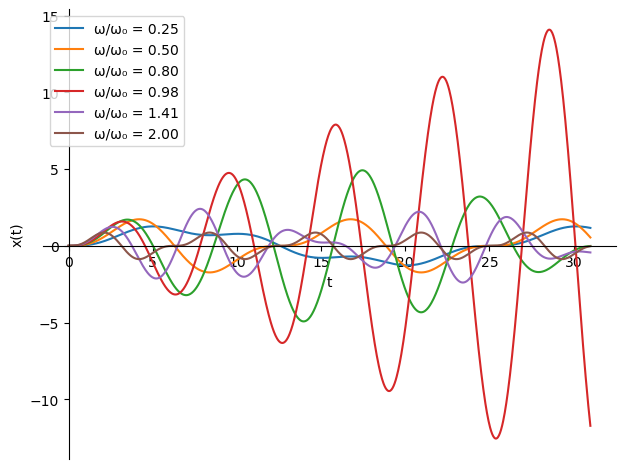

In [11]:
xt = sp.dsolve(ode, x, ics = {x.subs(t, 0): 0.0, x.diff().subs(t, 0): 0.0}).rhs

a_val = 1
omega0_val = 1
ratios = [0.25, 0.5, 0.8, 0.98, sp.sqrt(2), 2.0]
xt = xt.subs({a: a_val})

p = sp.plot(show=False, xlabel='t', ylabel='x(t)')

for r in ratios:
    omega_val = r * omega0_val
    expr = xt.subs({omega0: omega0_val, omega: omega_val})
    p.extend(sp.plot(expr, (t, 0, 31), show=False, label=f"ω/ω₀ = {float(r):.2f}"))
p.legend = True
p.show()

Обратите внимание, что наибольшая амплитуда колебаний наблюдается при $\omega / \omega_{0} \approx 1$. Явление увеличения амплитуды колебаний при приближении частоты внешней силы к собственной частоте свободных колебаний маятника называется **резонансом**.

---

**Задание**

Для первых 50 секунд постройте фазовые портреты (графики зависимости скорости $\dot{x}$ от смещения $x$) для каждого значения отношения частот $\omega / \omega_{0}$, показывая траекторию системы в фазовом пространстве.